# **🏠 Real Estate Price Prediction & Fraud Detection**

# Project Introduction

This project leverages Machine Learning to predict real estate prices and detect fraudulent property listings. By analyzing historical property data and market trends, it aims to provide accurate pricing insights and identify potential scams.  

📅 *Start Date:* 15 Aug 2025  
👨‍💻 *Developer:* Subhranil Dutta  

---

## 📌 Project Goals
1. Predict property prices accurately using historical data and market trends.  
2. Detect fraudulent property listings to prevent scams.  
3. Build an end-to-end ML workflow for real estate analysis.

---

## 💡 Why This Project Matters
Real estate is one of the world’s largest industries, but pricing transparency and fraud detection remain major challenges.  
This project uses AI to predict prices and spot unusual or fake listings, helping buyers, sellers, and property websites make safer and smarter choices.

---

## 📂 Dataset Information
- *Source:*   [Kaggle – India House Price Prediction](https://www.kaggle.com/datasets/ankushpanday1/india-house-price-prediction)  
- *Size:* 39.2 MB
- *Format:* CSV  
- *Features Include:* Location, Area, Bedrooms, Bathrooms, Year Built, Amenities, Furnishing, Price.
- *Target Variable:* Price_in_Lakhs
---

## 🛠 Tech Stack
- *Language:* Python  
- *Libraries:* Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, SciPy  
- *Environment:* Google Colab  

---


# **Phase 0 – Data Foundation & Preprocessing**

# Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

# Load the Dataset

In [ ]:
housing=pd.read_csv('india_housing_prices.csv')

In [ ]:
housing.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


# Initial Data Exploration

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'BHK'}>,
        <Axes: title={'center': 'Size_in_SqFt'}>],
       [<Axes: title={'center': 'Price_in_Lakhs'}>,
        <Axes: title={'center': 'Price_per_SqFt'}>,
        <Axes: title={'center': 'Year_Built'}>],
       [<Axes: title={'center': 'Floor_No'}>,
        <Axes: title={'center': 'Total_Floors'}>,
        <Axes: title={'center': 'Age_of_Property'}>],
       [<Axes: title={'center': 'Nearby_Schools'}>,
        <Axes: title={'center': 'Nearby_Hospitals'}>, <Axes: >]],
      dtype=object)

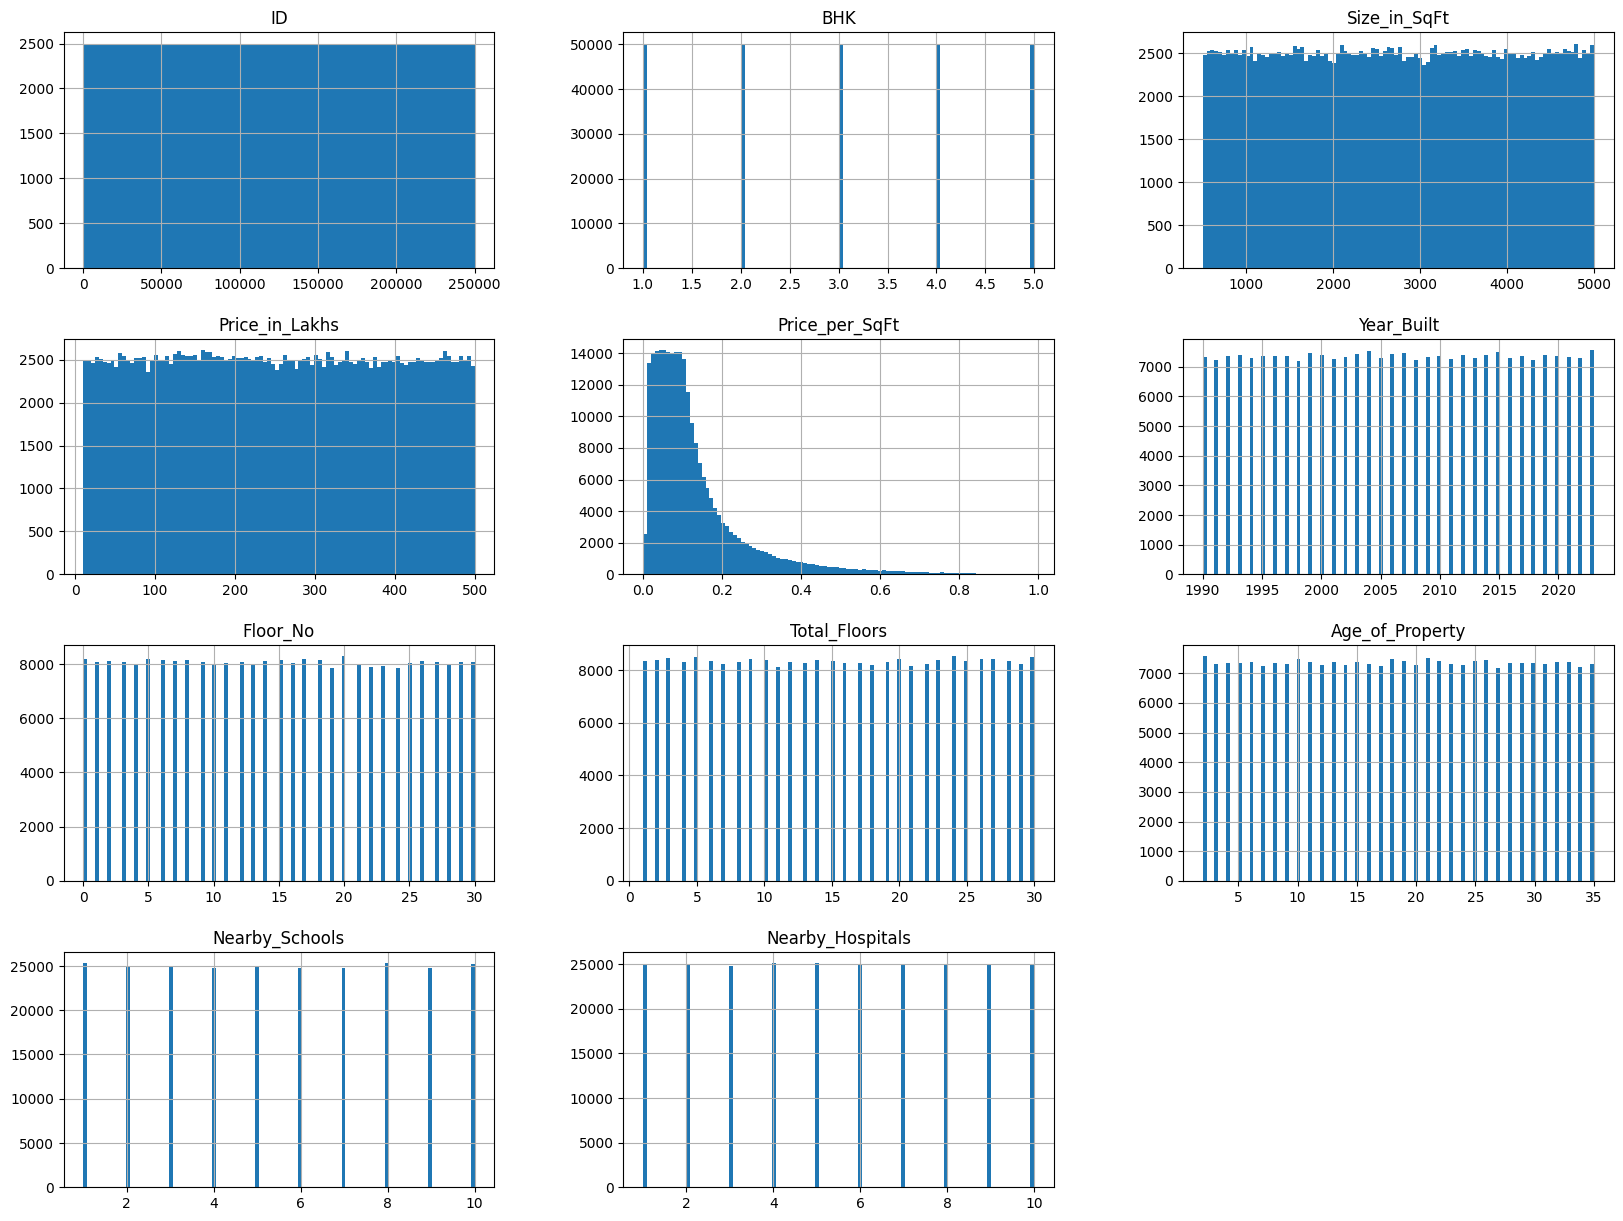

In [ ]:
housing.hist(figsize=(20,15),bins=100)

<Axes: ylabel='Density'>

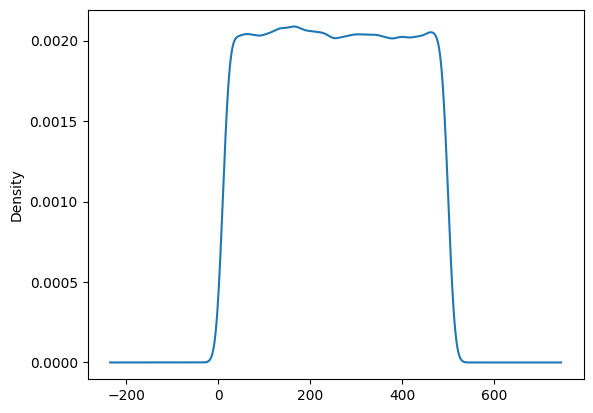

In [ ]:
housing['Price_in_Lakhs'].plot.kde()

# Explore Categorical Features

In [ ]:
cat_cols=housing.select_dtypes(include='object').columns
cat_cols

Index(['State', 'City', 'Locality', 'Property_Type', 'Furnished_Status',
       'Public_Transport_Accessibility', 'Parking_Space', 'Security',
       'Amenities', 'Facing', 'Owner_Type', 'Availability_Status'],
      dtype='object')

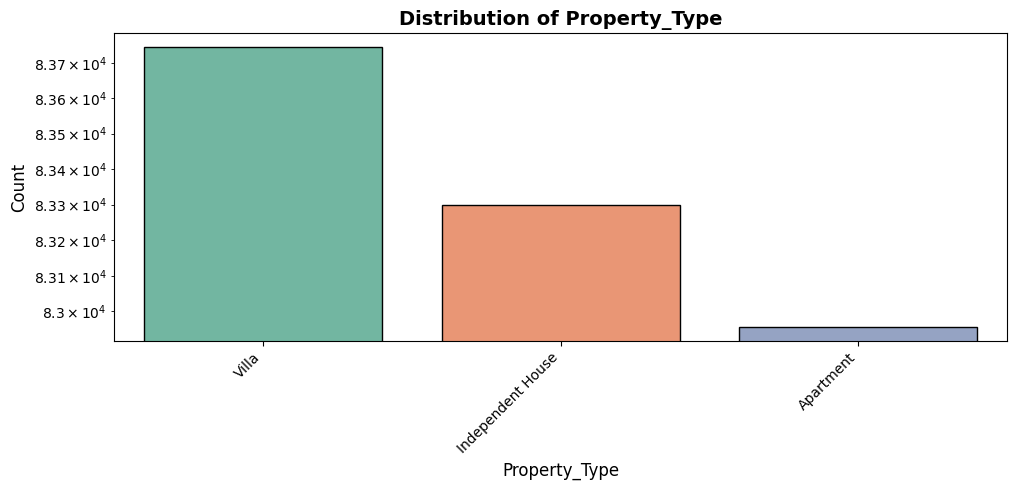

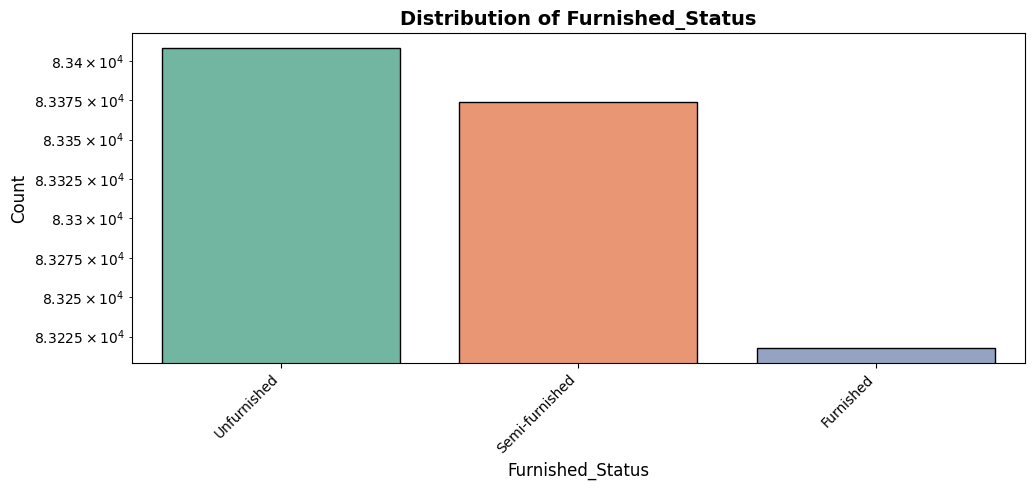

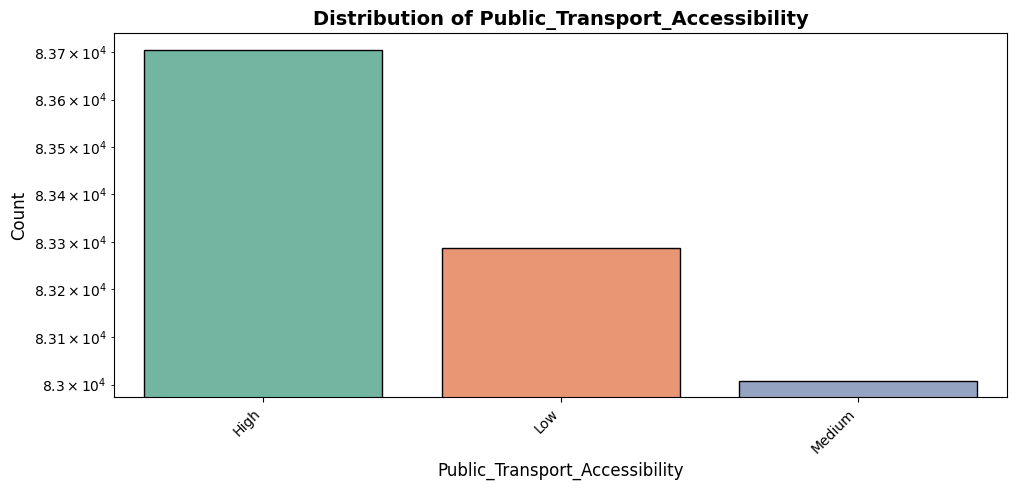

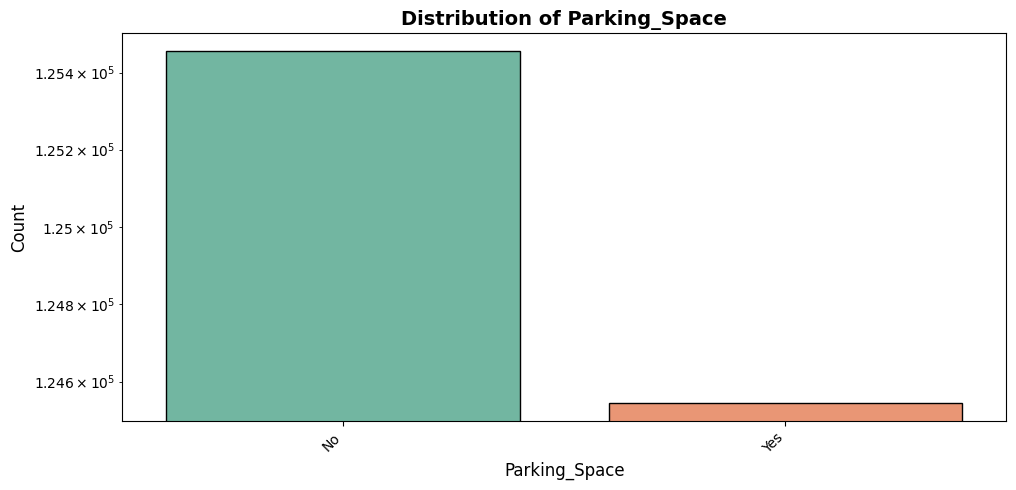

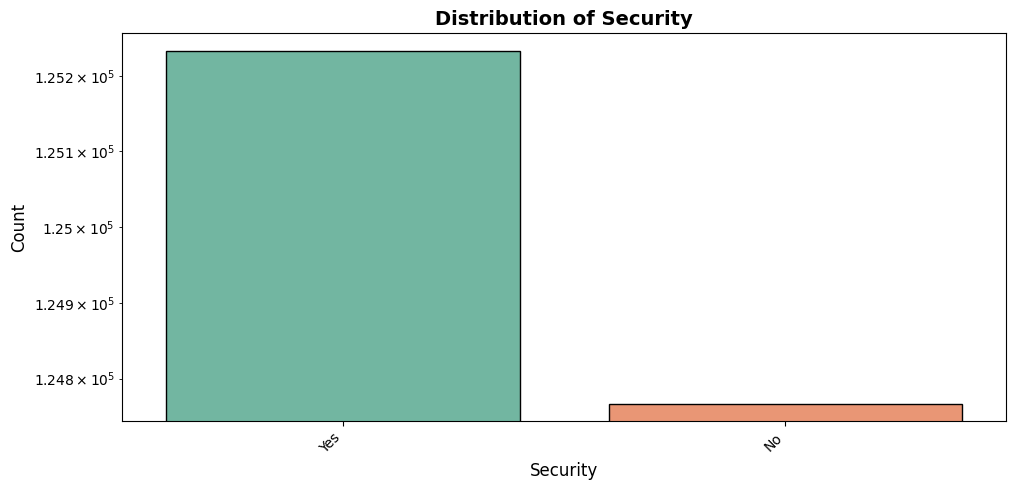

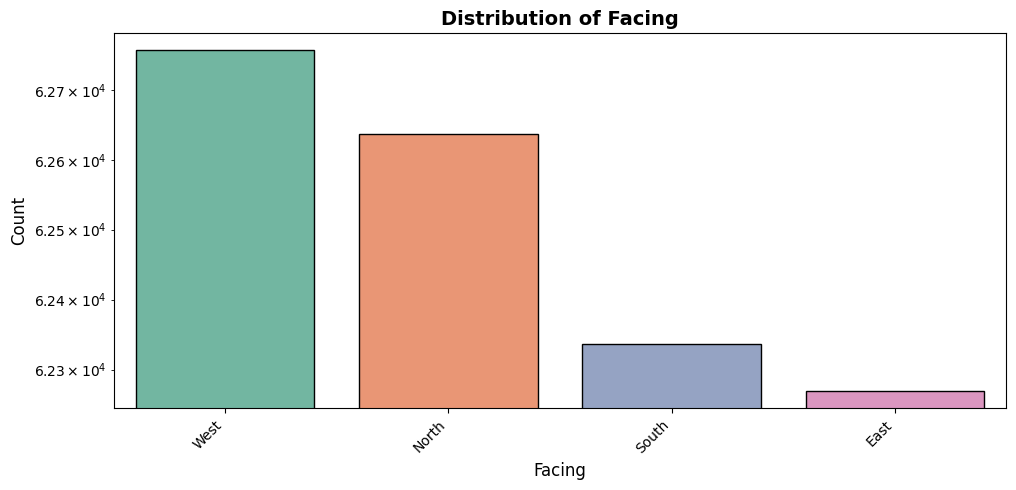

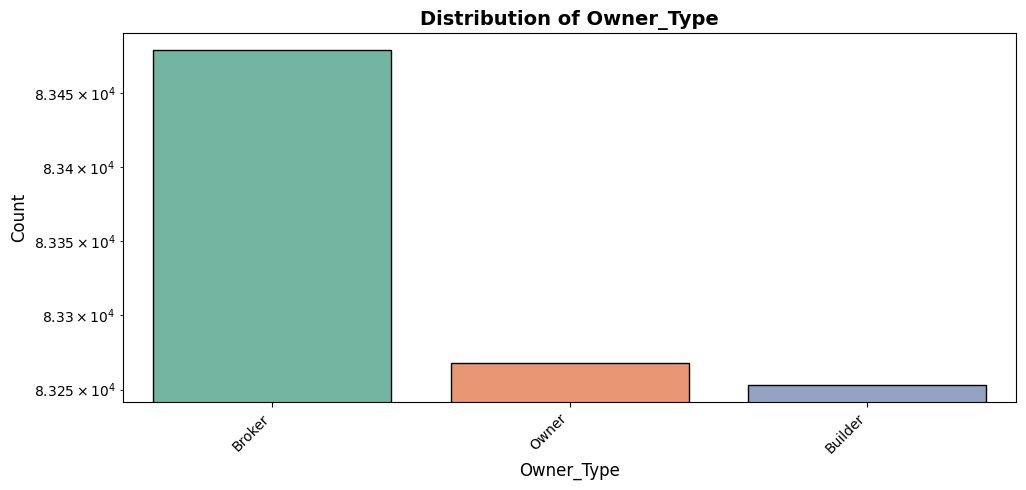

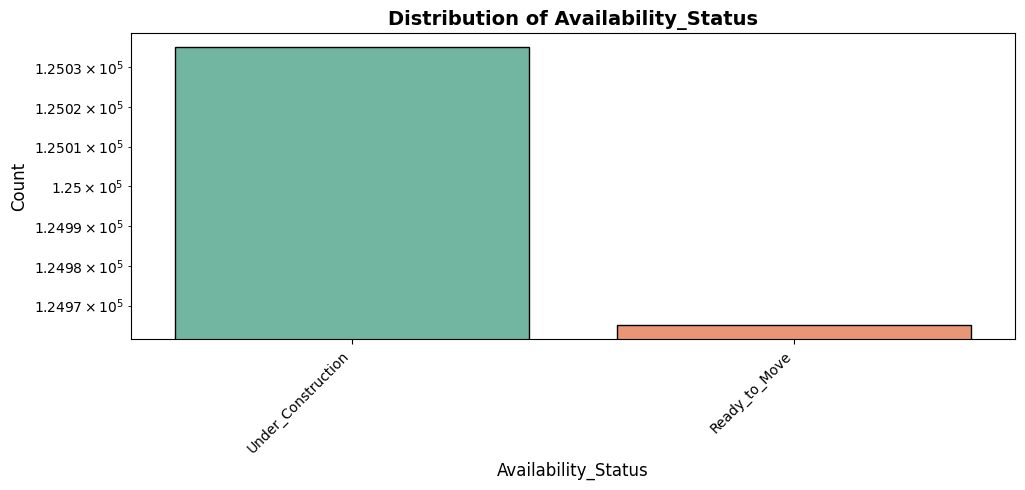

In [ ]:
cat_cols = [col for col in cat_cols if housing[col].nunique() <= 15]

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    order = housing[col].value_counts().index
    sns.countplot(x=col, data=housing, order=order, palette="Set2", edgecolor="black")
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Distribution of {col}", fontsize=14, weight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.yscale("log")
    plt.show()

# Summary Statistics and Dataset Info

In [ ]:
housing.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

# Karl Pearson Correlation Coefficient

In [ ]:
num_cols=housing.select_dtypes(include=['int64','float64']).columns
corr_matrix=housing[num_cols].corr()
corr_matrix

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
ID,1.000000,-0.001718,-0.002293,-0.001636,-0.001344,0.002734,-0.000214,0.003382,-0.002734,-0.001203,0.001429
BHK,-0.001718,1.000000,-0.001033,-0.000980,0.001174,0.000917,0.001263,-0.002862,-0.000917,-0.000762,0.001162
Size_in_SqFt,-0.002293,-0.001033,1.000000,-0.002529,-0.614533,0.004135,-0.002775,-0.003451,-0.004135,0.001966,-0.001695
Price_in_Lakhs,-0.001636,-0.000980,-0.002529,1.000000,0.555625,0.002714,-0.001719,0.001283,-0.002714,0.000155,-0.002769
Price_per_SqFt,-0.001344,0.001174,-0.614533,0.555625,1.000000,-0.001212,-0.001906,0.004175,0.001212,-0.000094,-0.000145
Year_Built,0.002734,0.000917,0.004135,0.002714,-0.001212,1.000000,-0.000686,0.003452,-1.000000,-0.000591,-0.002719
Floor_No,-0.000214,0.001263,-0.002775,-0.001719,-0.001906,-0.000686,1.000000,0.001169,0.000686,-0.000635,0.001428
Total_Floors,0.003382,-0.002862,-0.003451,0.001283,0.004175,0.003452,0.001169,1.000000,-0.003452,-0.003093,-0.005867
Age_of_Property,-0.002734,-0.000917,-0.004135,-0.002714,0.001212,-1.000000,0.000686,-0.003452,1.000000,0.000591,0.002719
Nearby_Schools,-0.001203,-0.000762,0.001966,0.000155,-0.000094,-0.000591,-0.000635,-0.003093,0.000591,1.000000,-0.002246


In [ ]:
corr_matrix['Price_in_Lakhs'].sort_values(ascending=False)

,Price_in_Lakhs
Price_in_Lakhs,1.000000
Price_per_SqFt,0.555625
Year_Built,0.002714
Total_Floors,0.001283
Nearby_Schools,0.000155
BHK,-0.000980
ID,-0.001636
Floor_No,-0.001719
Size_in_SqFt,-0.002529
Age_of_Property,-0.002714


In [ ]:
housing['Price_per_SqFt'].min(),housing['Price_per_SqFt'].max()

(0.0, 0.99)

In [ ]:
len(np.unique(housing['Price_per_SqFt']))

100

In [ ]:
housing['income_cat']=np.ceil(housing['Price_per_SqFt'])

In [ ]:
housing['income_cat'].value_counts().sort_index()

,count
income_cat,
0.0,2534
1.0,247466


In [ ]:
housing['income_cat'].value_counts().sort_index()/len(housing)

,count
income_cat,
0.0,0.010136
1.0,0.989864


# Shuffling and Splitting for Regression

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]
strat_train_set.shape,strat_test_set.shape

((200000, 24), (50000, 24))

In [ ]:
strat_train_set['income_cat'].value_counts().sort_index()/len(strat_train_set)

,count
income_cat,
0.0,0.010135
1.0,0.989865


In [ ]:
strat_test_set['income_cat'].value_counts().sort_index()/len(strat_test_set)

,count
income_cat,
0.0,0.01014
1.0,0.98986


In [ ]:
strat_train_set.drop('income_cat',axis=1,inplace=True)
strat_test_set.drop('income_cat',axis=1,inplace=True)

In [ ]:
strat_train_set.shape,strat_test_set.shape

((200000, 23), (50000, 23))

In [ ]:
X_train_reg=strat_train_set.drop('Price_in_Lakhs',axis=1)
y_train_reg=strat_train_set['Price_in_Lakhs'].copy()

In [ ]:
X_test_reg=strat_test_set.drop('Price_in_Lakhs',axis=1)
y_test_reg=strat_test_set['Price_in_Lakhs'].copy()

In [ ]:
X_train_reg.shape,y_train_reg.shape

((200000, 22), (200000,))

In [ ]:
X_test_reg.shape,y_test_reg.shape

((50000, 22), (50000,))

# Data Preprocessing

In [ ]:
X_train_num=X_train_reg.select_dtypes(include=['int64','float64'])
X_train_num[:5]

,ID,BHK,Size_in_SqFt,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
169532,169533,3,1630,0.02,2012,17,15,13,8,6
111989,111990,2,4573,0.01,2008,24,17,17,6,3
198798,198799,1,3133,0.08,1997,2,15,28,6,4
46962,46963,5,2089,0.09,1990,25,18,35,8,1
106552,106553,2,2635,0.13,1997,9,6,28,3,10


In [ ]:
X_train_cat=X_train_reg.select_dtypes(include='object')
X_train_cat[:5]

,State,City,Locality,Property_Type,Furnished_Status,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
169532,Uttar Pradesh,Noida,Locality_294,Independent House,Furnished,Low,No,Yes,"Pool, Gym, Clubhouse, Garden",North,Owner,Under_Construction
111989,Odisha,Bhubaneswar,Locality_12,Apartment,Semi-furnished,Medium,No,Yes,"Pool, Garden, Playground",West,Broker,Under_Construction
198798,Gujarat,Ahmedabad,Locality_191,Independent House,Unfurnished,High,No,No,Clubhouse,East,Builder,Ready_to_Move
46962,Maharashtra,Nagpur,Locality_326,Independent House,Furnished,High,Yes,Yes,"Pool, Gym, Playground, Garden, Clubhouse",North,Broker,Under_Construction
106552,Tamil Nadu,Chennai,Locality_121,Independent House,Unfurnished,Medium,No,No,"Playground, Garden, Clubhouse, Gym",East,Broker,Under_Construction


# Pipleline

# Custom Transformers

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):

  # Constructor
  def __init__(self,attribute_names):
    self.attribute_names=attribute_names
  # Fit Method
  def fit(self,x,y=None):
    return self
  # Transform Method
  def transform(self,x):
    return x[self.attribute_names].values

dfs=DataFrameSelector(X_train_num.columns)
dfs.fit_transform(housing)[:5]

array([[   1.  ,    1.  , 4740.  ,    0.1 , 1990.  ,   22.  ,    1.  ,
          35.  ,   10.  ,    3.  ],
       [   2.  ,    3.  , 2364.  ,    0.08, 2008.  ,   21.  ,   20.  ,
          17.  ,    8.  ,    1.  ],
       [   3.  ,    2.  , 3642.  ,    0.05, 1997.  ,   19.  ,   27.  ,
          28.  ,    9.  ,    8.  ],
       [   4.  ,    2.  , 2741.  ,    0.11, 1991.  ,   21.  ,   26.  ,
          34.  ,    5.  ,    7.  ],
       [   5.  ,    4.  , 4823.  ,    0.04, 2002.  ,    3.  ,    2.  ,
          23.  ,    4.  ,    9.  ]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline,FeatureUnion
num_pipe=Pipeline([
    ('dfs',DataFrameSelector(X_train_num.columns)),
    ('scaler',StandardScaler())
])
cat_pipe=Pipeline([
    ('dfs',DataFrameSelector(X_train_cat.columns)),
    ('encoder',OneHotEncoder(sparse_output=False))
])
full_pipe=FeatureUnion(transformer_list=[
    ('num_pipe',num_pipe),
    ('cat_pipe',cat_pipe)
])

In [ ]:
X_train_prepared_reg=full_pipe.fit_transform(X_train_reg)
X_test_prepared_reg=full_pipe.transform(X_test_reg)

In [ ]:
X_train_prepared_reg[:5]

array([[ 0.61647691,  0.00263642, -0.86013468, ...,  1.        ,
         0.        ,  1.        ],
       [-0.1811261 , -0.70417779,  1.40283237, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.02213267, -1.41099199,  0.29557021, ...,  0.        ,
         1.        ,  0.        ],
       [-1.08246477,  1.41626483, -0.50719487, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25648831, -0.70417779, -0.08735796, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
X_test_prepared_reg[:5]

array([[ 0.16230768,  1.41626483, -0.95548226, ...,  0.        ,
         1.        ,  0.        ],
       [-0.22038043, -0.70417779,  1.47895665, ...,  1.        ,
         1.        ,  0.        ],
       [-1.72445043, -0.70417779, -0.36724923, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.12575744,  0.70945062,  0.48626536, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.39967835,  0.00263642,  0.05412554, ...,  1.        ,
         0.        ,  1.        ]])

# ***Summary:***

Performed exploratory data analysis (EDA), cleaning, and preprocessing on a real-world housing dataset, including handling categorical and numerical features, feature engineering, correlation analysis, stratified splitting, and building robust pipelines with scaling and one-hot encoding to prepare data for regression modeling.

# **Phase 1- Regression Model Training & Evaluation**

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train_prepared_reg,y_train_reg)

LinearRegression()

In [ ]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
y_pred_lin_1=lin_reg.predict(X_train_prepared_reg)
rmse_1=root_mean_squared_error(y_train_reg,y_pred_lin_1)
rmse_1

100.3346385489609

In [ ]:
y_pred_lin_2=lin_reg.predict(X_test_prepared_reg)
rmse_2=root_mean_squared_error(y_test_reg,y_pred_lin_2)
rmse_2

101.04773471172825

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train_prepared_reg,y_train_reg)

DecisionTreeRegressor()

In [ ]:
from sklearn.metrics import root_mean_squared_error
y_pred_tree_1=tree_reg.predict(X_train_prepared_reg)
rmse_3=root_mean_squared_error(y_train_reg,y_pred_tree_1)
rmse_3

0.0

In [ ]:
y_pred_tree_2=tree_reg.predict(X_test_prepared_reg)
rmse_4=root_mean_squared_error(y_test_reg,y_pred_tree_2)
rmse_4

12.32081731810029

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(random_state=42)
forest_reg.fit(X_train_prepared_reg,y_train_reg)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_forest_1=forest_reg.predict(X_train_prepared_reg)
rmse_5=root_mean_squared_error(y_train_reg,y_pred_forest_1)
rmse_5

3.333509865738296

In [ ]:
y_pred_forest_2=forest_reg.predict(X_test_prepared_reg)
rmse_6=root_mean_squared_error(y_test_reg,y_pred_forest_2)
rmse_6

8.916524123692101

# Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_reg=GradientBoostingRegressor()
gbr_reg.fit(X_train_prepared_reg,y_train_reg)

GradientBoostingRegressor()

In [ ]:
y_pred_gbr_1=gbr_reg.predict(X_train_prepared_reg)
rmse_7=root_mean_squared_error(y_train_reg,y_pred_gbr_1)
rmse_7

13.719339539539536

In [ ]:
y_pred_gbr_2=gbr_reg.predict(X_test_prepared_reg)
rmse_8=root_mean_squared_error(y_test_reg,y_pred_gbr_2)
rmse_8

13.77298720117547

# XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor
xgb_reg=XGBRegressor()
xgb_reg.fit(X_train_prepared_reg,y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xgb_1=xgb_reg.predict(X_train_prepared_reg)
rmse_9=root_mean_squared_error(y_train_reg,y_pred_xgb_1)
rmse_9

8.963339363011745

In [ ]:
y_pred_xgb_2=xgb_reg.predict(X_test_prepared_reg)
rmse_10=root_mean_squared_error(y_test_reg,y_pred_xgb_2)
rmse_10

9.26690353044158

# Comparison of Regression Models

In [ ]:
rmse_data=pd.DataFrame({
     'Model':['Linear Regression','Decision Tree Regressor','Random Forest Regressor','Gradient Boosting Regressor','XGBoost Regressor'],
     'RMSE Train':[rmse_1,rmse_3,rmse_5,rmse_7,rmse_9],
     'RMSE Test':[rmse_2,rmse_4,rmse_6,rmse_8,rmse_10]
 })
rmse_data

,Model,RMSE Train,RMSE Test
0,Linear Regression,100.334639,101.047735
1,Decision Tree Regressor,0.000000,12.320817
2,Random Forest Regressor,3.333510,8.916524
3,Gradient Boosting Regressor,13.719340,13.772987
4,XGBoost Regressor,8.963339,9.266904


In [ ]:
rmse_data.sort_values(by='RMSE Test')

,Model,RMSE Train,RMSE Test
2,Random Forest Regressor,3.333510,8.916524
4,XGBoost Regressor,8.963339,9.266904
1,Decision Tree Regressor,0.000000,12.320817
3,Gradient Boosting Regressor,13.719340,13.772987
0,Linear Regression,100.334639,101.047735


# Saving and Loading the Best Regression Model

In [ ]:
import joblib

In [ ]:
joblib.dump(forest_reg,'best_regression_model.pkl')
print("Random Forest Regressor saved successfully!")

Random Forest Regressor saved successfully!


In [ ]:
joblib.load('best_regression_model.pkl')
print("Random Forest Regressor loaded successfully!")

Random Forest Regressor loaded successfully!


# ***Summary:***

Trained and compared multiple regression models (Linear, Decision Tree, Random Forest, Gradient Boosting, XGBoost), identified **Random Forest** as the best-performing model based on **RMSE**, and saved it for deployment.


# **Phase 2: Price Category Prediction (Classification Models)**

# Creating the Target Variable for Classification

In [ ]:
housing['Price_Range']=pd.qcut(housing['Price_in_Lakhs'],q=3,labels=['Low','Medium','High'])

In [ ]:
housing['Price_Range'][:3]

,Price_Range
0,High
1,Medium
2,Medium


# Defining Features (X) and Target (y)

In [ ]:
X=housing.drop(['Price_in_Lakhs'],axis=1)
y=housing['Price_Range']

# Shuffling and Splitting for Classification

In [ ]:
from sklearn.model_selection import train_test_split
X_train_clf,X_test_clf,y_train_clf,y_test_clf=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Data Preprocessing for Classification

In [ ]:
X_train_prepared_clf=full_pipe.fit_transform(X_train_clf)
X_test_prepared_clf=full_pipe.transform(X_test_clf)

# Classification Model Training & Evaluation

# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train_prepared_clf,y_train_clf)

SGDClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_sgd=cross_val_score(sgd_clf,X_train_prepared_clf,y_train_clf,cv=3,scoring='accuracy')
accuracy_sgd

array([0.72316138, 0.71375643, 0.71432214])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred_sgd=cross_val_predict(sgd_clf,X_train_prepared_clf,y_train_clf,cv=3)
conf_mat_sgd=confusion_matrix(y_train_clf,y_train_pred_sgd)
conf_mat_sgd

array([[66120,     0,   543],
       [ 1617, 62610,  2442],
       [31097, 20885, 14686]])

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_sgd=precision_score(y_train_clf,y_train_pred_sgd,average='weighted')
recall_sgd=recall_score(y_train_clf,y_train_pred_sgd,average='weighted')
f1_sgd=f1_score(y_train_clf,y_train_pred_sgd,average='weighted')
precision_sgd,recall_sgd,f1_sgd

(0.7499836829538111, 0.71708, 0.6603964622473794)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_prepared_clf,y_train_clf)

DecisionTreeClassifier(random_state=42)

In [ ]:
accuracy_tree=cross_val_score(tree_clf,X_train_prepared_clf,y_train_clf,cv=3,scoring='accuracy')
accuracy_tree

array([0.96208019, 0.96164519, 0.96293463])

In [ ]:
y_train_pred_tree=cross_val_predict(tree_clf,X_train_prepared_clf,y_train_clf,cv=3)
conf_mat_tree=confusion_matrix(y_train_clf,y_train_pred_tree)
conf_mat_tree

array([[64785,     0,  1878],
       [    0, 64766,  1903],
       [ 1951,  1824, 62893]])

In [ ]:
precision_tree=precision_score(y_train_clf,y_train_pred_tree,average='weighted')
recall_tree=recall_score(y_train_clf,y_train_pred_tree,average='weighted')
f1_tree=f1_score(y_train_clf,y_train_pred_tree,average='weighted')
precision_tree,recall_tree,f1_tree

(0.9622215522478195, 0.96222, 0.9622205646603944)

# Random Forest Classifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_prepared_clf,y_train_clf)

RandomForestClassifier(random_state=42)

In [ ]:
accuracy_forest=cross_val_score(forest_clf,X_train_prepared_clf,y_train_clf,cv=3,scoring='accuracy')
accuracy_forest

array([0.90673047, 0.9202604 , 0.92718927])

In [ ]:
y_train_pred_forest=cross_val_predict(forest_clf,X_train_prepared_clf,y_train_clf,cv=3)
conf_mat_forest=confusion_matrix(y_train_clf,y_train_pred_forest)
conf_mat_forest

array([[64867,     0,  1796],
       [  182, 61362,  5125],
       [ 7916,  1369, 57383]])

In [ ]:
precision_forest=precision_score(y_train_clf,y_train_pred_forest,average='weighted')
recall_forest=recall_score(y_train_clf,y_train_pred_forest,average='weighted')
f1_forest=f1_score(y_train_clf,y_train_pred_forest,average='weighted')
precision_forest,recall_forest,f1_forest

(0.9198552475676555, 0.91806, 0.9179371899493503)

# Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbr_clf=GradientBoostingClassifier(random_state=42)
gbr_clf.fit(X_train_prepared_clf,y_train_clf)

GradientBoostingClassifier(random_state=42)

In [ ]:
accuracy_gbr=cross_val_score(gbr_clf,X_train_prepared_clf,y_train_clf,cv=3,scoring='accuracy')
accuracy_gbr

array([0.96892016, 0.96832016, 0.96830468])

In [ ]:
y_train_pred_gbr=cross_val_predict(gbr_clf,X_train_prepared_clf,y_train_clf,cv=3)
conf_mat_gbr=confusion_matrix(y_train_clf,y_train_pred_gbr)
conf_mat_gbr

array([[65444,     0,  1219],
       [    0, 64592,  2077],
       [ 1928,  1073, 63667]])

In [ ]:
precision_gbr=precision_score(y_train_clf,y_train_pred_gbr,average='weighted')
recall_gbr=recall_score(y_train_clf,y_train_pred_gbr,average='weighted')
f1_gbr=f1_score(y_train_clf,y_train_pred_gbr,average='weighted')
precision_gbr,recall_gbr,f1_gbr

(0.96860701997499, 0.968515, 0.9685316225702757)

# XGB Classifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_train_encoded=label_encoder.fit_transform(y_train_clf)

In [ ]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(random_state=42)
xgb_clf.fit(X_train_prepared_clf,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
accuracy_xgb=cross_val_score(xgb_clf,X_train_prepared_clf,y_train_encoded,cv=3,scoring='accuracy')
accuracy_xgb

array([0.97081015, 0.97012015, 0.9700747 ])

In [ ]:
y_train_pred_xgb=cross_val_predict(xgb_clf,X_train_prepared_clf,y_train_encoded,cv=3)
conf_mat_xgb = confusion_matrix(y_train_clf,label_encoder.inverse_transform(y_train_pred_xgb))
conf_mat_xgb

array([[65259,     0,  1404],
       [    0, 65101,  1568],
       [ 1618,  1343, 63707]])

In [ ]:
precision_xgb = precision_score(y_train_clf, label_encoder.inverse_transform(y_train_pred_xgb),average='weighted')
recall_xgb = recall_score(y_train_clf, label_encoder.inverse_transform(y_train_pred_xgb),average='weighted')
f1_xgb = f1_score(y_train_clf, label_encoder.inverse_transform(y_train_pred_xgb),average='weighted')
precision_xgb, recall_xgb, f1_xgb

(0.9703405995987795, 0.970335, 0.9703360294561391)

# Comparision of Classification Models

In [ ]:
class_data=pd.DataFrame({
     'Model':['SGD Classifier','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','XGB Classifier'],
     'Accuracy':[accuracy_sgd.mean(),accuracy_tree.mean(),accuracy_forest.mean(),accuracy_gbr.mean(),accuracy_xgb.mean()],
     'Precision':[precision_sgd,precision_tree,precision_forest,precision_gbr,precision_xgb],
     'Recall':[recall_sgd,recall_tree,recall_forest,recall_gbr,recall_xgb],
     'F1 Score':[f1_sgd,f1_tree,f1_forest,f1_gbr,f1_xgb]
 })
class_data

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.717080,0.749984,0.717080,0.660396
1,Decision Tree Classifier,0.962220,0.962222,0.962220,0.962221
2,Random Forest Classifier,0.918060,0.919855,0.918060,0.917937
3,Gradient Boosting Classifier,0.968515,0.968607,0.968515,0.968532
4,XGB Classifier,0.970335,0.970341,0.970335,0.970336


In [ ]:
class_data.round(4)

,Model,Accuracy,Precision,Recall,F1 Score
0,SGD Classifier,0.7171,0.7500,0.7171,0.6604
1,Decision Tree Classifier,0.9622,0.9622,0.9622,0.9622
2,Random Forest Classifier,0.9181,0.9199,0.9181,0.9179
3,Gradient Boosting Classifier,0.9685,0.9686,0.9685,0.9685
4,XGB Classifier,0.9703,0.9703,0.9703,0.9703


In [ ]:
class_data.sort_values(by='F1 Score',ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
4,XGB Classifier,0.970335,0.970341,0.970335,0.970336
3,Gradient Boosting Classifier,0.968515,0.968607,0.968515,0.968532
1,Decision Tree Classifier,0.962220,0.962222,0.962220,0.962221
2,Random Forest Classifier,0.918060,0.919855,0.918060,0.917937
0,SGD Classifier,0.717080,0.749984,0.717080,0.660396


# Saving and Loading the Best Classification Model

In [ ]:
import joblib
joblib.dump(xgb_clf,'best_classifiation_model.pkl')
print("XGB Classifier saved successfully!")

XGB Classifier saved successfully!


In [ ]:
joblib.load('best_classifiation_model.pkl')
print("XGB Classifier loaded successfully!")

XGB Classifier loaded successfully!


# ***Summary:***

Built and evaluated classification models (SGD, Decision Tree, Random Forest, Gradient Boosting, XGBoost), selected **XGBoost Classifier** as the best model based on highest **F1-score** and saved it for deployment.

# **Phase 3 – Hyperparameter Optimization**

# Hyperparameter Tuning for Regression Model

# Randomized Search Cross-Validation for Random Forest Regression


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
idx_tune = np.random.choice(len(X_train_prepared_reg), 5000, replace=False)
X_tune_reg = X_train_prepared_reg[idx_tune]
y_tune_reg = y_train_reg.iloc[idx_tune]
param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': randint(5, 23),
    'max_depth': [10, 20, None]
}
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_dist,n_iter=10,cv=3,scoring='neg_mean_squared_error',random_state=42,n_jobs=1)
rnd_search.fit(X_tune_reg,y_tune_reg)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b328b378aa0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b328e193290>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params=rnd_search.best_params_

In [ ]:
safe_n_estimators = min(best_params['n_estimators'], 150)
model_rnd_reg_safe = RandomForestRegressor(
    n_estimators=safe_n_estimators,
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    random_state=42,
    n_jobs=1
)

In [ ]:
idx_final = np.random.choice(len(X_train_prepared_reg), 50000, replace=False)
X_train_final_safe = X_train_prepared_reg[idx_final]
y_train_final_safe = y_train_reg.iloc[idx_final]

model_rnd_reg_safe.fit(X_train_final_safe, y_train_final_safe)

RandomForestRegressor(max_features=19, n_estimators=150, n_jobs=1,
                      random_state=42)

In [ ]:
y_test_pred_rnd_reg = model_rnd_reg_safe.predict(X_test_prepared_reg)

In [ ]:
rmse_rnd_reg = root_mean_squared_error(y_test_reg, y_test_pred_rnd_reg)
rmse_rnd_reg

70.57060336579259

# Grid Search Cross-Validation for Random Forest Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
idx = np.random.choice(len(X_train_prepared_reg), 5000, replace=False)
X_tune_reg_grid = X_train_prepared_reg[idx]
y_tune_reg_grid = y_train_reg.iloc[idx]
param_grid_reg = {
    "n_estimators": [50, 100],
    "max_features": [5, 10, 15],
    'max_depth': [10, None]
}
grid_search_reg = GridSearchCV(
    forest_reg,
    param_grid=param_grid_reg,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=1
)
grid_search_reg.fit(X_tune_reg_grid, y_tune_reg_grid)

GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=1,
             param_grid={'max_depth': [10, None], 'max_features': [5, 10, 15],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
best_params_grid = grid_search_reg.best_params_

In [ ]:
model_grid_reg_safe= RandomForestRegressor(
    n_estimators=min(best_params_grid['n_estimators'], 150),
    max_features=best_params_grid['max_features'],
    max_depth=best_params_grid['max_depth'],
    random_state=42,
    n_jobs=1
)

In [ ]:
idx_final = np.random.choice(len(X_train_prepared_reg), 50000, replace=False)
X_train_final_safe = X_train_prepared_reg[idx_final]
y_train_final_safe = y_train_reg.iloc[idx_final]

In [ ]:
model_grid_reg_safe.fit(X_train_final_safe, y_train_final_safe)

RandomForestRegressor(max_features=15, n_jobs=1, random_state=42)

In [ ]:
y_test_pred_grid_reg = model_grid_reg_safe.predict(X_test_prepared_reg)

In [ ]:
rmse_grid_reg = root_mean_squared_error(y_test_reg, y_test_pred_grid_reg)
rmse_grid_reg

78.98324250155778

# Comparing Model Performance: Baseline vs Tuned Regression Model

In [ ]:
reg_results_df = pd.DataFrame({
    "Model": ["Baseline RF", "RandomizedSearch RF", "GridSearch RF"],
    "RMSE": [rmse_6, rmse_rnd_reg, rmse_grid_reg]
})
reg_results_df

,Model,RMSE
0,Baseline RF,8.916524
1,RandomizedSearch RF,70.570603
2,GridSearch RF,78.983243


In [ ]:
reg_results_df.sort_values(by='RMSE')
reg_results_df

,Model,RMSE
0,Baseline RF,8.916524
1,RandomizedSearch RF,70.570603
2,GridSearch RF,78.983243


# Hyperparameter Tuning for Classification Model

# Randomized Search Cross-Validation for XGB Classifier

In [ ]:
from scipy.stats import randint, uniform
idx_tune_cls = np.random.choice(len(X_train_prepared_clf), 5000, replace=False)
X_tune_cls = X_train_prepared_clf[idx_tune_cls]
y_tune_cls = y_train_encoded[idx_tune_cls]
param_dist_cls = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(3, 15),
    "learning_rate": uniform(0.01, 0.2),
    "subsample": uniform(0.7, 0.3),
    "colsample_bytree": uniform(0.7, 0.3)
}
xgb_base = XGBClassifier(
    objective="multi:softmax",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=1
)
rnd_search_cls = RandomizedSearchCV(
    xgb_base,
    param_distributions=param_dist_cls,
    n_iter=10,
    cv=3,
    scoring="f1_weighted",
    random_state=42,
    n_jobs=1
)
rnd_search_cls.fit(X_tune_cls, y_tune_cls)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b328de4f440>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b328b0dc920>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b328b940aa0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7b328b0dcd40>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
best_params_cls = rnd_search_cls.best_params_
best_params_cls

{'colsample_bytree': np.float64(0.9896896099223678),
 'learning_rate': np.float64(0.17167946962329225),
 'max_depth': 11,
 'n_estimators': 139,
 'subsample': np.float64(0.7293016342019151)}

In [ ]:
idx_final_cls = np.random.choice(len(X_train_prepared_clf), 50000, replace=False)
X_train_final_cls = X_train_prepared_clf[idx_final_cls]
y_train_final_cls = y_train_encoded[idx_final_cls]

In [ ]:
model_rnd_cls_safe = XGBClassifier(
    objective="multi:softmax",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=1,
    **best_params_cls
)

In [ ]:
model_rnd_cls_safe.fit(X_train_final_cls, y_train_final_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=np.float64(0.9896896099223678), device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None,
              learning_rate=np.float64(0.17167946962329225), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=139, n_jobs=1,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred_cls = model_rnd_cls_safe.predict(X_train_prepared_clf)

In [ ]:
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred_cls)

In [ ]:
conf_mat_cls_rnd = confusion_matrix(y_train_clf, y_train_pred_decoded)
precision_cls_rnd = precision_score(y_train_clf, y_train_pred_decoded, average="weighted")
recall_cls_rnd = recall_score(y_train_clf, y_train_pred_decoded, average="weighted")
f1_cls_rnd = f1_score(y_train_clf, y_train_pred_decoded, average="weighted")

conf_mat_cls_rnd, precision_cls_rnd, recall_cls_rnd, f1_cls_rnd

(array([[65386,     0,  1277],
        [    0, 65418,  1251],
        [ 1261,  1117, 64290]]),
 0.9754856138759626,
 0.97547,
 0.9754770654342321)

# Grid Search Cross-Validation for XGB Classifier

In [ ]:
idx_tune_cls = np.random.choice(len(X_train_prepared_clf), 5000, replace=False)
X_tune_cls = X_train_prepared_clf[idx_tune_cls]
y_tune_cls = y_train_encoded[idx_tune_cls]
param_grid_cls = {
    "n_estimators": [50, 150],
    "max_depth": [5, 15],
    "learning_rate": [0.05, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0]
}
xgb_base = XGBClassifier(
    objective="multi:softmax",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=1
)
grid_search_cls = GridSearchCV(
    xgb_base,
    param_grid=param_grid_cls,
    cv=3,
    scoring="f1_weighted",
    n_jobs=1
)
grid_search_cls.fit(X_tune_cls, y_tune_cls)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=1, num_parallel_tree=None, ...),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.05, 0.2], 'max_depth': [5, 15],
                         'n_estimators': [50, 150], 'subsample': [0.7, 1.0]},
             scoring='f1_weighted')

In [ ]:
best_params_cls_grid=grid_search_cls.best_params_

In [ ]:
idx_final_cls = np.random.choice(len(X_train_prepared_clf), 50000, replace=False)
X_train_final_cls = X_train_prepared_clf[idx_final_cls]
y_train_final_cls = y_train_encoded[idx_final_cls]

In [ ]:
model_grid_cls_safe = XGBClassifier(
    objective="multi:softmax",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=1,
    **best_params_cls_grid
)
model_grid_cls_safe.fit(X_train_final_cls, y_train_final_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=1,
              num_parallel_tree=None, ...)

In [ ]:
y_train_pred_cls = model_grid_cls_safe.predict(X_train_prepared_clf)

In [ ]:
y_train_pred_decoded = label_encoder.inverse_transform(y_train_pred_cls)

In [ ]:
conf_mat_cls_grid = confusion_matrix(y_train_clf, y_train_pred_decoded)
precision_cls_grid = precision_score(y_train_clf, y_train_pred_decoded, average="weighted")
recall_cls_grid = recall_score(y_train_clf, y_train_pred_decoded, average="weighted")
f1_cls_grid = f1_score(y_train_clf, y_train_pred_decoded, average="weighted")

conf_mat_cls_grid, precision_cls_grid, recall_cls_grid, f1_cls_grid

(array([[65529,     0,  1134],
        [    0, 65481,  1188],
        [ 1299,  1118, 64251]]),
 0.976298593326141,
 0.976305,
 0.9763010429012695)

# Comparing Model Performance: Baseline vs Tuned Classification Model

In [ ]:
cls_results_df=pd.DataFrame({
    "Model": ["Baseline XGB", "RandomizedSearch XGB", "GridSearch XGB"],
    "Precision": [precision_xgb, precision_cls_rnd, precision_cls_grid],
    "Recall": [recall_xgb, recall_cls_rnd, recall_cls_grid],
    "F1 Score": [f1_xgb, f1_cls_rnd, f1_cls_grid]
})
cls_results_df

,Model,Precision,Recall,F1 Score
0,Baseline XGB,0.970341,0.970335,0.970336
1,RandomizedSearch XGB,0.975486,0.975470,0.975477
2,GridSearch XGB,0.976299,0.976305,0.976301


In [ ]:
cls_results_df.sort_values(by='F1 Score',ascending=False)

,Model,Precision,Recall,F1 Score
2,GridSearch XGB,0.976299,0.976305,0.976301
1,RandomizedSearch XGB,0.975486,0.975470,0.975477
0,Baseline XGB,0.970341,0.970335,0.970336


# Saving and Loading the Best Tuned Classification Model

In [ ]:
joblib.dump(model_rnd_cls_safe, "tuned_classification_model.pkl")

['tuned_classification_model.pkl']

In [ ]:
loaded_cls_model = joblib.load("tuned_classification_model.pkl")

# ***Summary:***

Systematically tuned hyperparameters using RandomizedSearchCV and GridSearchCV. Regression models were compared using RMSE and classification models using F1-score. Despite hardware constraints (RAM crashes), successfully managed training by using subsets and repeated trials. Final outcome: **Baseline Random Forest** for **regression** and **GridSearch-optimized XGBoost** for **classification** (saved for deployment).


# **Phase 4 – Feature Engineering & Data Enhancement**

# Feature importances from Random Forest Regressor

In [ ]:
rf_quick=RandomForestRegressor(n_estimators=100,n_jobs=1,random_state=42)
rf_quick.fit(X_train_prepared_reg,y_train_reg)

RandomForestRegressor(n_jobs=1, random_state=42)

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
num_features = list(X_train_num.columns)
cat_features = list(encoder.get_feature_names_out(X_train_cat.columns))

In [ ]:
feature_names = num_features + cat_features

In [ ]:
importances = rf_quick.feature_importances_

In [ ]:
len(feature_names), len(importances)


(919, 919)

In [ ]:
features_imp=pd.DataFrame({
    'Feature':feature_names,
    'Importance':importances
})

In [ ]:
features_imp= features_imp.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Visualization of Top 20 Features by Importance

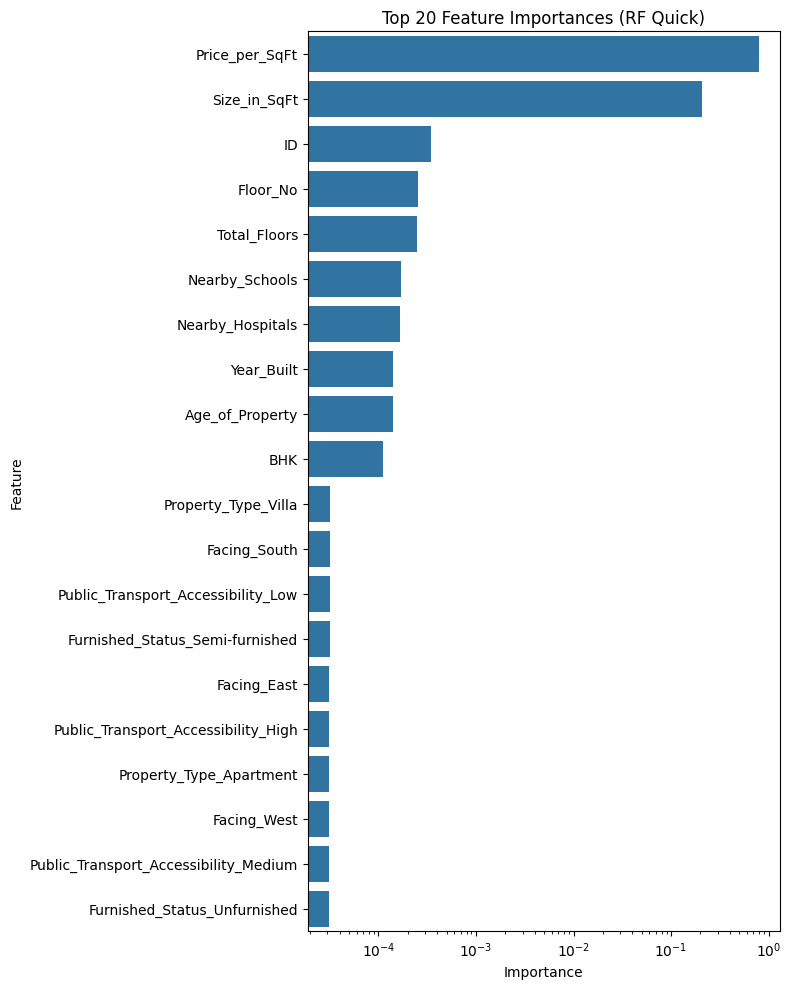

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(x="Importance", y="Feature", data=features_imp.head(20))
plt.xscale("log")
plt.title("Top 20 Feature Importances (RF Quick)")
plt.tight_layout()
plt.show()

# Shortlist & safe feature selection

In [ ]:
top_k=40
top_features=features_imp.head(top_k)['Feature'].tolist()

In [ ]:
X_train_features_df= pd.DataFrame(X_train_prepared_reg, columns=feature_names)
X_test_features_df= pd.DataFrame(X_test_prepared_reg, columns=feature_names)

In [ ]:
X_train_top = X_train_features_df[top_features]
X_test_top  = X_test_features_df[top_features]

# Train Model with Top-k Features

In [ ]:
rf_top = RandomForestRegressor(n_estimators=100, n_jobs=1, random_state=42)
rf_top.fit(X_train_top, y_train_reg)

RandomForestRegressor(n_jobs=1, random_state=42)

In [ ]:
pred_top = rf_top.predict(X_test_top)

In [ ]:
rmse_top = root_mean_squared_error(y_test_reg, pred_top)

# Comparing Model Performance: Full vs Top-k Features

In [ ]:
feature_results_df = pd.DataFrame({
    "Model": ["Full", "Top-k"],
    "RMSE": [rmse_6, rmse_top]
})
feature_results_df

,Model,RMSE
0,Full,8.916524
1,Top-k,8.903304


In [ ]:
feature_results_df=feature_results_df.sort_values(by="RMSE")
feature_results_df

,Model,RMSE
1,Top-k,8.903304
0,Full,8.916524


# Saving and Loading the Best Regression Model (Top-k Features)

In [ ]:
joblib.dump(rf_top, "top_k_regression_model.pkl")

['top_k_regression_model.pkl']

In [ ]:
loaded_top_k_regression_model = joblib.load("top_k_regression_model.pkl")

# Correlation Analysis of Numerical Features

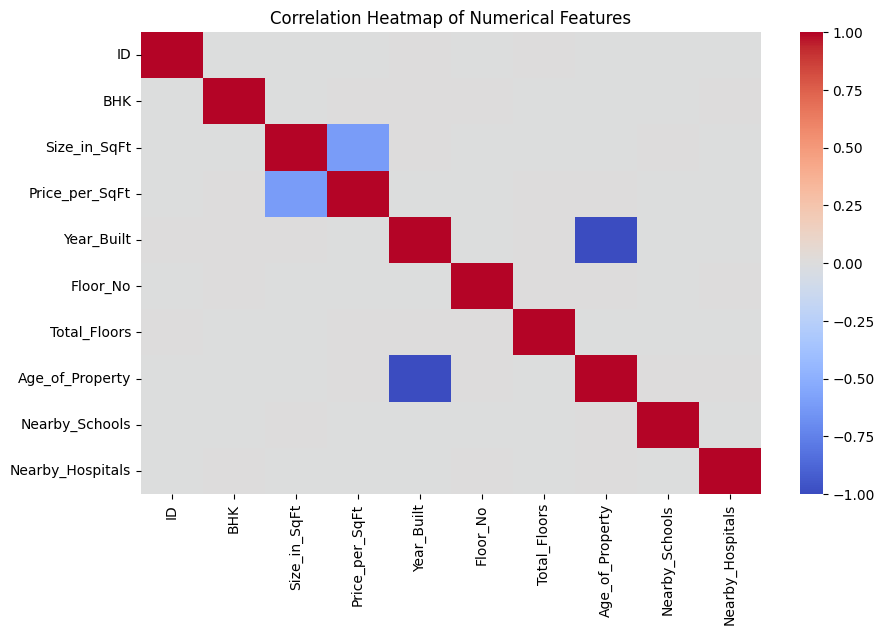

In [ ]:
corr_analy= X_train_num.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_analy, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# ***Summary:***

Identified **Top 40** features using **Random Forest** importance, compared models on **Full** vs. **Top-k** features with **RMSE** as the metric, and found the **Top-k Model** performed best. Saved the final model and validated feature relationships through correlation heatmaps.

# **Phase 5 – Project Wrap-Up & Insights Documentation**

# Comparing Regression Model Performance: Baseline vs Tuned vs Top-k Features

In [ ]:
final_reg_df = pd.DataFrame({
    "Model": ["Baseline RF", "RandomizedSearch RF", "GridSearch RF", "Top-K"],
    "RMSE": [rmse_6, rmse_rnd_reg, rmse_grid_reg, rmse_top]
})
final_reg_df

,Model,RMSE
0,Baseline RF,8.916524
1,RandomizedSearch RF,70.570603
2,GridSearch RF,78.983243
3,Top-K,8.903304


In [ ]:
final_reg_df=final_reg_df.sort_values(by="RMSE")
final_reg_df

,Model,RMSE
3,Top-K,8.903304
0,Baseline RF,8.916524
1,RandomizedSearch RF,70.570603
2,GridSearch RF,78.983243


# Comparing Model Performance: Baseline vs Tuned Classification Model

In [ ]:
cls_results_df=pd.DataFrame({
    "Model": ["Baseline XGB", "RandomizedSearch XGB", "GridSearch XGB"],
    "Precision": [precision_xgb, precision_cls_rnd, precision_cls_grid],
    "Recall": [recall_xgb, recall_cls_rnd, recall_cls_grid],
    "F1 Score": [f1_xgb, f1_cls_rnd, f1_cls_grid]
})
cls_results_df

,Model,Precision,Recall,F1 Score
0,Baseline XGB,0.970341,0.970335,0.970336
1,RandomizedSearch XGB,0.975486,0.975470,0.975477
2,GridSearch XGB,0.976299,0.976305,0.976301


In [ ]:
cls_results_df.sort_values(by='F1 Score',ascending=False)

,Model,Precision,Recall,F1 Score
2,GridSearch XGB,0.976299,0.976305,0.976301
1,RandomizedSearch XGB,0.975486,0.975470,0.975477
0,Baseline XGB,0.970341,0.970335,0.970336


# Final Model Results & Export for Reporting

In [ ]:
final_reg_df.to_csv("regression_results.csv",index=False)
cls_results_df.to_csv("classification_results.csv",index=False)

# Visualization of Top 20 Features by Importance

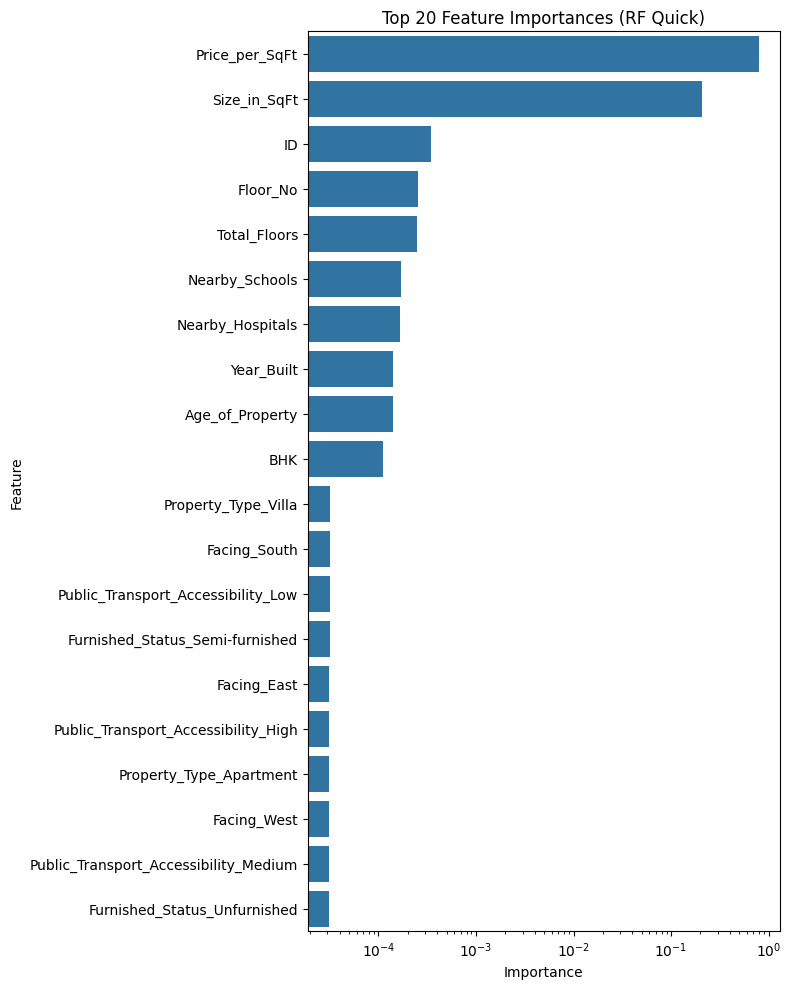

In [ ]:
plt.figure(figsize=(8,10))
sns.barplot(x="Importance", y="Feature", data=features_imp.head(20))
plt.xscale("log")
plt.title("Top 20 Feature Importances (RF Quick)")
plt.tight_layout()
plt.show()

# Predicted vs Actual Prices Visualization – Regression Model

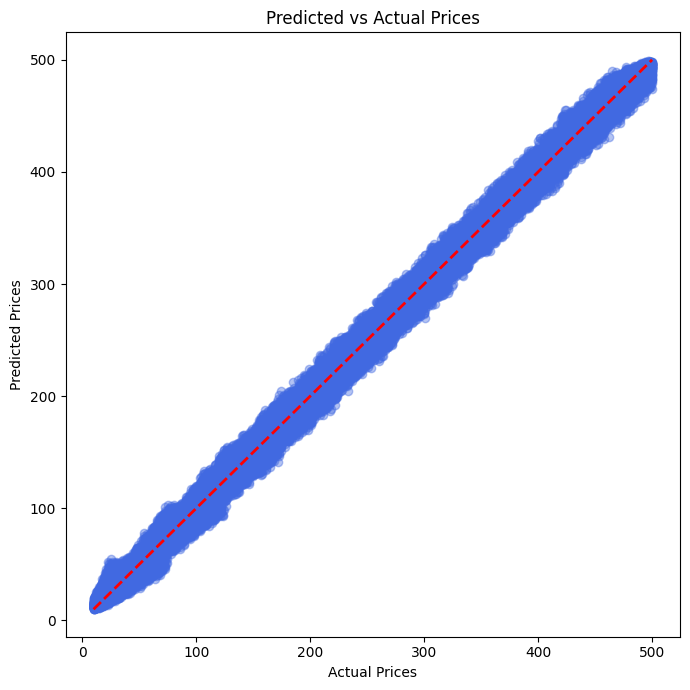

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test_reg, y_pred_forest_2, alpha=0.4, color="royalblue")
plt.plot([y_test_reg.min(), y_test_reg.max()],
         [y_test_reg.min(), y_test_reg.max()],
         "r--", lw=2)
plt.title("Predicted vs Actual Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.tight_layout()
plt.show()

# Confusion Matrix Visualization – GridSearch Optimized XGB Classifier

<Figure size 800x600 with 0 Axes>

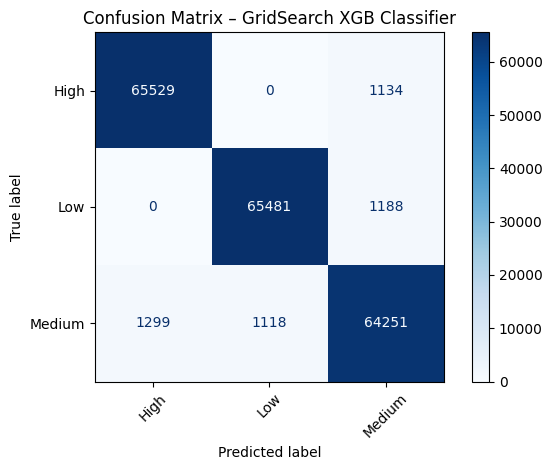

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_cls_grid,
                              display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format="d", xticks_rotation=45)
plt.title("Confusion Matrix – GridSearch XGB Classifier")
plt.tight_layout()
plt.show()

# ***Summary:***

Consolidated results by comparing **Baseline** vs **Tuned** vs **Top-k** **Regression Models** and **Baseline** vs **Tuned** **Classification Models**. Exported final model results for reporting. Enhanced interpretability with visualizations: top 20 feature importances, predicted vs. actual prices **(Regression)**, and confusion matrix **(optimized XGB classifier)**.